# ***Salary Prediction***

This notebook will not go deeply into data exploration and cleaning it because the data has been cleaned already. Download it at the following link: `"https://www.kaggle.com/rsadiq/salary"` or just simply download it in the "Data" folder.

In this project, let's explore, compare models and conclude which model should be used for a small dataset with only 1 feature or at least in this dataset. 

*Note:* All the functions used in this notebooks are fully shown in Scripts folder.

In [1]:
# Insert the path to the "Scripts" file and import files from "Scripts"
import sys
import os
sys.path.insert(0,os.path.abspath('../Scripts'))
from data_loading import load_data, preprocess_data, poly, scale
from model_training import train_linear_regression, train_neural_network
from model_comparision import evaluate_model
from predict import lr_input, pl_input, nn_input
from utils import plot_data, plot_model
import joblib

In [2]:
# Load the data
df = load_data(os.path.abspath('../Data/Salary.csv'))

Data Loaded Successfully.


In [3]:
# Display the first 5 rows of the dataset
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


According to the information of the data above, the value domain of both feature and target is very different, so we need to rescale the feature based on the normal distribution.

The steps to split the data and distribute the normal distribution are shown in the `data_loading.py` file in the Scripts folder.

The function below is a shorthand for the above steps.

In [5]:
# Preprocessing data 
X_train, X_test, y_train, y_test, X_range = preprocess_data(df) # X_range used for better visualization later

Data Preprocessing  Completed.


In [6]:
print(f'The shape of the training set (input): {X_train.shape}')
print(f'The shape of the training set (target): {y_train.shape}')
print(f'The shape of the test set (input): {X_test.shape}')
print(f'The shape of the test set (target): {y_test.shape}')

The shape of the training set (input): (28, 1)
The shape of the training set (target): (28, 1)
The shape of the test set (input): (7, 1)
The shape of the test set (target): (7, 1)


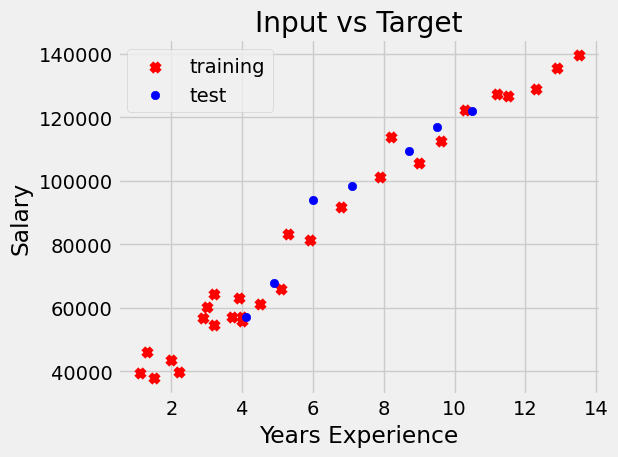

In [7]:
# Visualization
plot_data(X_train, X_test, y_train, y_test)

Take a look at the dataset visualized above, there are 35 examples with 28 examples used for training marked with letter "x" and 7 examples used for test marked with letter "o".

In [8]:
# Load the scaler from data_loading.py
scaler_X = joblib.load('scaler_X')
# Scale the data 
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
X_range_scaled = scaler_X.transform(X_range)

In [9]:
# Train models
linear_model = train_linear_regression(X_train_scaled, y_train)
neural_network_model = train_neural_network(X_train_scaled, y_train)
# Get the y_range of the neural network model
y_range_nn = neural_network_model.predict(X_range_scaled, verbose = 0)

Linear Regression Model Trained.
Neural Network Model Trained.


In [10]:
# Evaluate the model on the training set and test set
lr = evaluate_model(linear_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Regression')
nn = evaluate_model(neural_network_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Neural Network')
# Go to file model_comparison.py to know what value is stored in these arguments

- Linear Regression:
 + Training set: Mean Squared Error: 15444481.890501972, R^2 Score: 0.9716360897963994        
 + Test set    : Mean Squared Error: 27880895.65313008, R^2 Score: 0.8914234140042779
- Neural Network:
 + Training set: Mean Squared Error: 15611922.175209317, R^2 Score: 0.971328584421109        
 + Test set    : Mean Squared Error: 29203381.00982339, R^2 Score: 0.8862732586130908


**We can see there is almost no difference between the Neural Network Model and Linear Regression Model.**

**In this case, learning_rate of the neural network model varies from 5.00 up to 10.00 (You can modify it in `model_training.py` to see hows it changing the model, remember to restart the notebook and run again each time you adjust it) to get the right fit with the data, and this is very unusual, difficult to grasp a appropriate value. This phenomenon may occur because the data domain of the value set is too large, ranging from 35000 to 140000.**

`So we can conclude that, when the data set is small, we should use Linear Regression for simplicity and ease of implementation.`

**Graph of the model is shown below.**

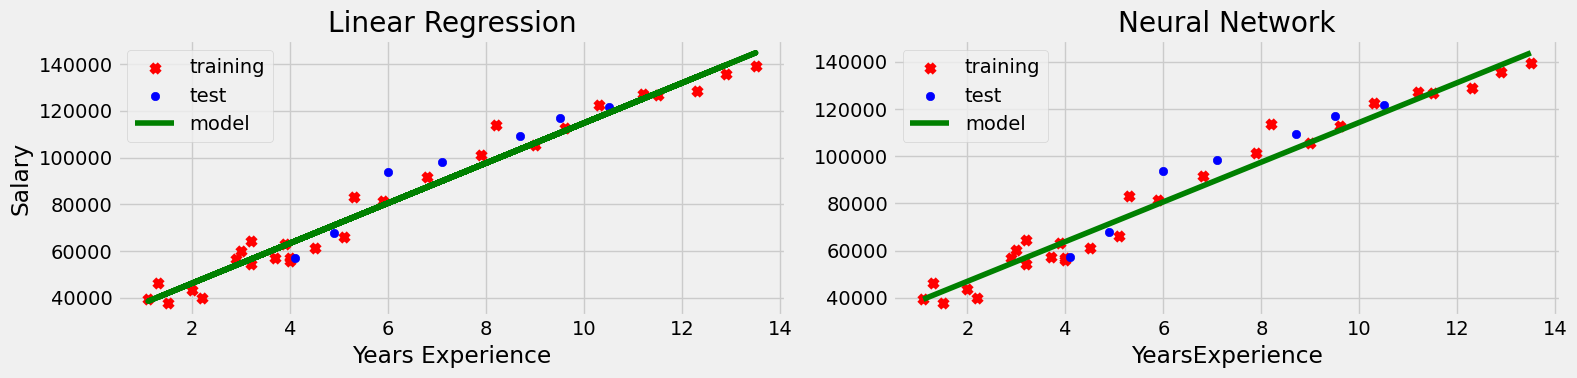

In [11]:
plot_model(X_train, X_test, y_train, y_test, X_range, lr, y_range_nn, 'Linear Regression', 'Neural Network')

**Ok, so now lets try to add a Polynomial Features with `degree = 2` to the Regression Model**

In [12]:
# Transform the training and the test set
X_train_poly, X_test_poly, X_range_poly = poly(X_train, X_test, X_range, degree=2) 
# Display the first 5 rows
print(X_train_poly[:5])

[[  4.    16.  ]
 [  3.2   10.24]
 [  5.1   26.01]
 [  3.7   13.69]
 [ 12.9  166.41]]


In [13]:
# Then we scale them
X_train_poly_scaled, X_test_poly_scaled, X_range_poly_scaled = scale(X_train_poly, X_test_poly, X_range_poly)
# Display the first 5 rows
print(X_train_poly_scaled[:5])

[[-0.54629147 -0.64035499]
 [-0.75727301 -0.74502141]
 [-0.25619186 -0.45846073]
 [-0.62540955 -0.68233058]
 [ 1.8008781   2.09278331]]


In [14]:
# Train a model 
polynomial_model = train_linear_regression(X_train_poly_scaled, y_train)
y_range_poly = polynomial_model.predict(X_range_poly_scaled)
# Evaluate
pl = evaluate_model(polynomial_model, X_train_poly_scaled, X_test_poly_scaled, y_train, y_test, 'Polynomial Model')

Linear Regression Model Trained.
- Polynomial Model:
 + Training set: Mean Squared Error: 13936764.591400852, R^2 Score: 0.9744050242538523        
 + Test set    : Mean Squared Error: 21176587.96852139, R^2 Score: 0.9175320027998454


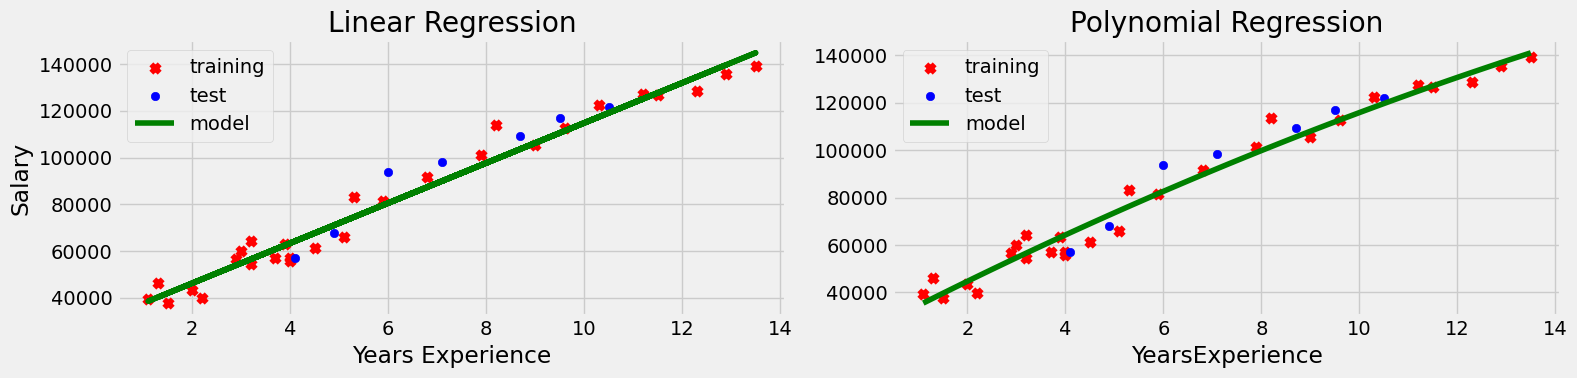

In [15]:
# Plotting
plot_model(X_train, X_test, y_train, y_test, X_range, lr, y_range_poly, 'Linear Regression', 'Polynomial Regression')

As we see above, the **Polynomial Regression** model looks a bit better than the Linear Regression with a slight curve, it fits the dataset almost perfectly, very close to the actual value. That is also clear when we look at its MSE and R^2 Score when compared to the previous 2 models. Polynomial Regression with order 2 seems to be the best choice for this dataset.

Or you can also adjust the degree value above to see how the model changes. Adding more features with higher order can make the model fit perfectly on the training set but predict incorrectly on new data. This is also known as `overfitting`.

In [16]:
# Now you can predict salary based on the model just has created.
linear_model_input = lr_input(10)
polynomial_model_input = pl_input(10)           # Adjust 10 to any number you want to predict
neural_network_model_input = nn_input(10)

print(f'Predict with Linear Regression Model: {linear_model.predict(linear_model_input)[0][0]}')
print(f'Predict with Polynomial Regression Model: {polynomial_model.predict(polynomial_model_input)[0][0]}')
print(f'Predict with Neural Network Model: {neural_network_model.predict(neural_network_model_input, verbose = 0)[0][0]}')

Predict with Linear Regression Model: 114866.30080126613
Predict with Polynomial Regression Model: 115885.44050765062
Predict with Neural Network Model: 114365.1015625


## Conclusion
So through this project, I came to the conclusion that, with a simple dataset with small size and one feature, it is advisable to use *Linear Regression Model* for simplicity and efficiency. In addition, after comparing with the dataset, if it is reasonable, adding a few features and implementing *Polynomial Regression* is not bad (best for this data set). But overusing that will cause the model to overfit and will require adding a regularizer parameter which is complicated to adjust. Creating a complex model for a small problem is not recommended. 

And finally thank you everyone for reading the notebook. Feel free to contribute or reach out for collaboration!